<a href="https://colab.research.google.com/github/listguy/ML-Course-ipynb/blob/main/MajorHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
randomState=79

params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize' : 22,
          'axes.labelsize' : 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24 }
pylab.rcParams.update(params)

## Loading the dataset

In [2]:
# !rm *.csv
from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [3]:
dataset = pd.read_csv(filename)

In [4]:
dataset.shape

(1250, 26)

In [5]:
dataset.spread.value_counts()

-1    646
 1    604
Name: spread, dtype: int64

In [6]:

train_data, test_data = train_test_split(dataset, test_size=0.20, random_state=randomState)

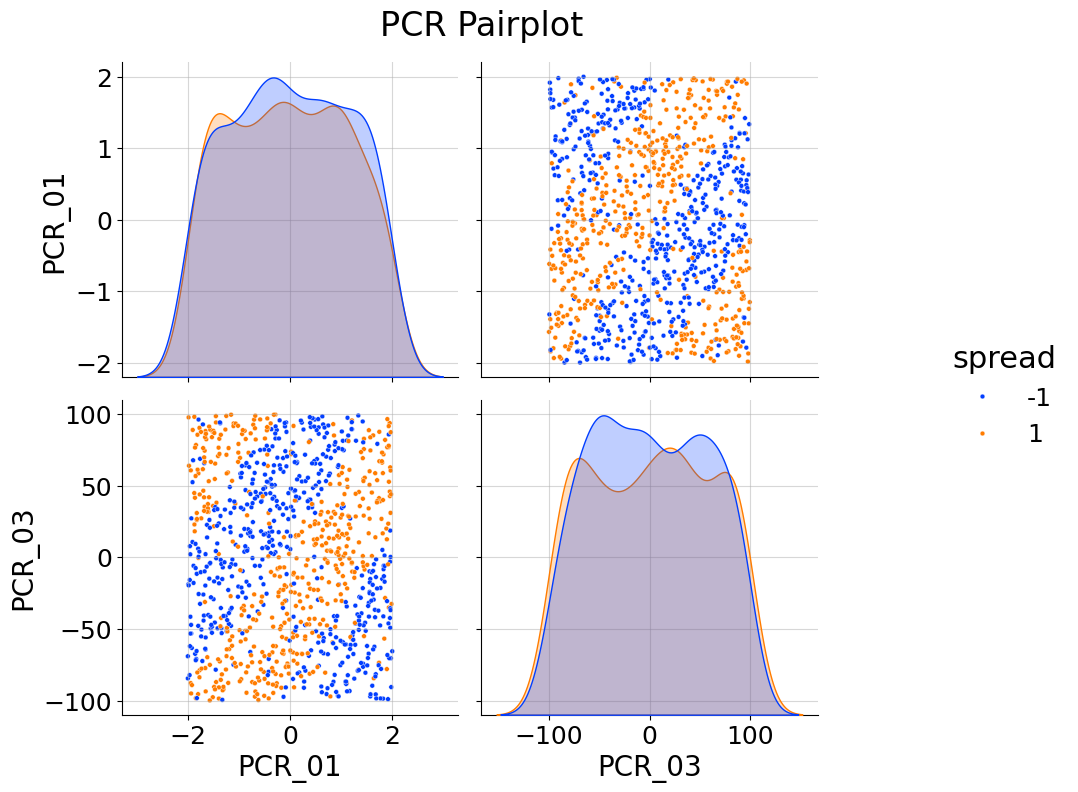

In [7]:
# Q5 - pairplots of PCR
g=sns.pairplot(train_data[['PCR_01','PCR_03', 'spread']], hue='spread', plot_kws={"s": 12}, palette='bright')
g.fig.suptitle("PCR Pairplot", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [8]:
# Q6 - Correlation of PCR and spread

print("Correlation of PCR_01 and spread is: {:.3f}".format(train_data['PCR_01'].corr(train_data['spread'])))
print("Correlation of PCR_03 and spread is: {:.3f}".format(train_data['PCR_03'].corr(train_data['spread'])))

Correlation of PCR_01 and spread is: -0.011
Correlation of PCR_03 and spread is: 0.003


In [9]:
# Q7 - KNN implementation
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):

  def __init__(self, n_neighbors:int = 3):
    self.n_neighbors = n_neighbors


  def fit(self, X, y):
    self.data = np.copy(X)
    self.labels = np.copy(y)
    return self

  def predict(self, X):
    distances = cdist(X, self.data) # calculate distances from all neighbors
    nearestNeigborsIndices = np.argpartition(distances, self.n_neighbors)[:,:self.n_neighbors] # get indices of n_neighbors nearest neighbors
    nearestLabels = self.labels[nearestNeigborsIndices] # get labels for each indices row
    predictions = np.sign(np.sum(nearestLabels, axis=1)) # get prediction by majority

    return predictions





In [10]:
# visualize_clf.py
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


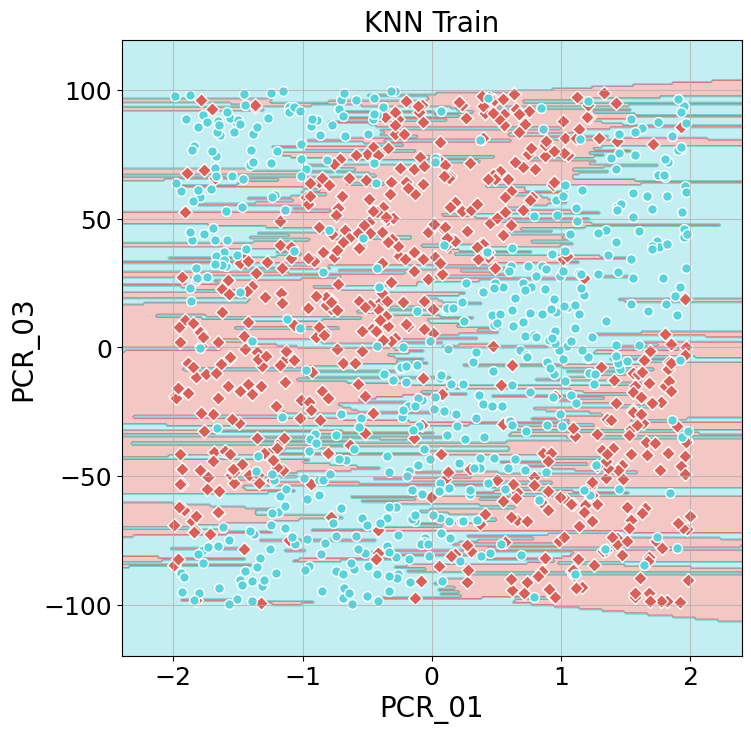

Train score🚄: 1.000
Test score:🧪 0.696


In [16]:
# Testing the prediction 🎉🥂🎉🙌🎁🎊

tempDF = train_data[["PCR_01","PCR_03"]]
tempY = train_data["spread"]

oneNNTest = kNN(1)
oneNNTest.fit(tempDF, tempY)
visualize_clf(oneNNTest,tempDF,tempY, "KNN Train", "PCR_01", "PCR_03") # visualize it filualize it
print("Train score🚄: {:.3f}".format(oneNNTest.score(tempDF, tempY)))
print("Test score:🧪 {:.3f}".format(oneNNTest.score(test_data[["PCR_01", "PCR_03"]], test_data["spread"])))


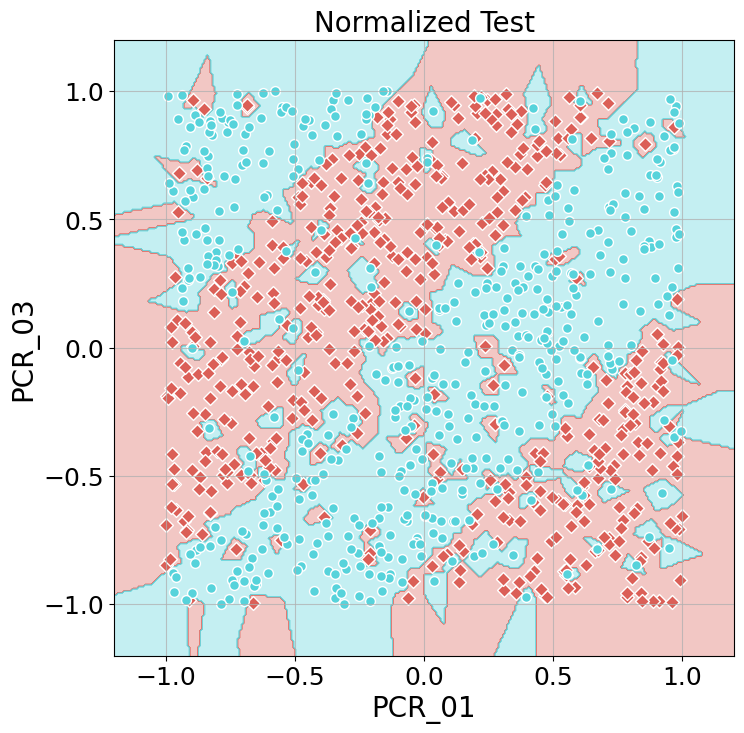

Train score🚄: 1.000
Test score:🧪 0.792


In [20]:
# normalized KNN ⬆
tempDF = train_data[["PCR_01","PCR_03"]]
tempY = train_data["spread"]
scaler = MinMaxScaler((-1,1))

normalizedX = scaler.fit_transform(tempDF)
normalizedTestX = scaler.fit_transform(test_data[["PCR_01","PCR_03"]])
oneNNTest = kNN(1)
oneNNTest.fit(normalizedX, tempY)
visualize_clf(oneNNTest,normalizedX,tempY, "Normalized Test", "PCR_01", "PCR_03") # visualize it filualize it
oneNNTest.score(normalizedX, tempY)
oneNNTest.score(normalizedTestX, test_data['spread'])

print("Train score🚄: {:.3f}".format(oneNNTest.score(normalizedX, tempY)))
print("Test score:🧪 {:.3f}".format(oneNNTest.score(normalizedTestX, test_data["spread"])))



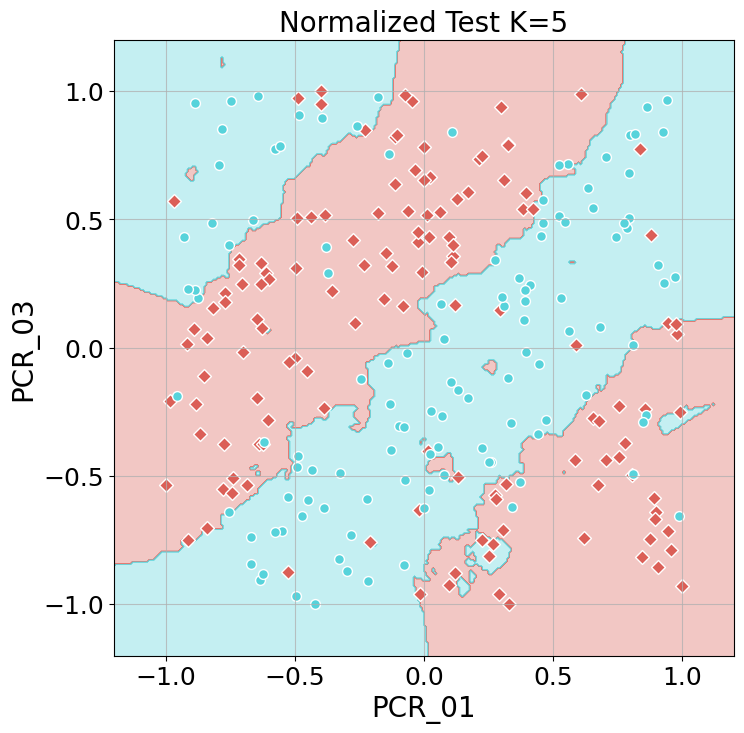

Train score🚄: 0.879
Test score:🧪 0.856


In [22]:
fiveNNTest = kNN(5)
fiveNNTest.fit(normalizedX, tempY)
visualize_clf(fiveNNTest,normalizedTestX,test_data['spread'], "Normalized Test K=5", "PCR_01", "PCR_03") # visualize it filualize it
fiveNNTest.score(normalizedTestX, test_data['spread'])

print("Train score🚄: {:.3f}".format(fiveNNTest.score(normalizedX, tempY)))
print("Test score:🧪 {:.3f}".format(fiveNNTest.score(normalizedTestX, test_data["spread"])))

In [ ]:
# Change blood type represantation

# train_data.insert(train_data.columns.get_loc("blood_type"),"SpecialProperty",train_data["blood_type"].isin(["O+", "B+"]))
# train_data.drop("blood_type", axis=1, inplace=True)
train_data

In [ ]:
# change symptoms columns

# List of symptoms to create columns for
symptoms_list = ['sore_throat', 'cough', 'shortness_of_breath', 'fever', 'smell_loss']

# Create a new column for each symptom
# for symptom in symptoms_list:
    # train_data[symptom] = train_data['symptoms'].str.contains(symptom, na=False)

# Optionally convert boolean columns to integers
# for symptom in symptoms_list:
    # train_data[symptom] = train_data[symptom].astype(int)

# train_data.drop("symptoms", axis=1, inplace=True)

train_data


In [57]:
# train_data.drop(["patient_id", "current_location","pcr_date", ], axis=1, inplace=True)
# train_data["x_chromosomes"] = train_data["sex"].apply(lambda sex: int(sex == "M"))
# train_data.drop("sex", axis=1, inplace=True)
train_data["SpecialProperty"] = train_data["SpecialProperty"].astype(int)


train_data

,age,weight,SpecialProperty,num_of_siblings,happiness_score,household_income,conversations_per_day,sugar_levels,sport_activity,PCR_01,...,PCR_09,PCR_10,spread,risk,sore_throat,cough,shortness_of_breath,fever,smell_loss,x_chromosomes
319,4,15.4,0,0,10,0,7,59,2,-0.739114,...,5.729131,-9.943844,1,-1,0,1,1,1,1,0
638,16,43.0,1,3,10,2,1,66,2,-1.703738,...,-2.327488,-5.625047,-1,1,0,0,0,1,0,1
324,37,63.5,0,3,8,1,2,75,1,0.010646,...,2.883810,0.954116,1,-1,1,0,0,0,0,0
697,25,43.5,0,1,8,3,4,83,0,-0.348491,...,-7.276843,-4.983045,-1,1,0,0,0,0,1,1
966,28,65.3,1,2,11,2,5,79,0,-1.407149,...,1.276840,-7.911564,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,37,72.0,0,2,9,1,1,104,2,-1.736936,...,0.559413,-11.604748,-1,-1,0,0,1,0,0,0
835,24,82.9,0,1,8,2,7,97,2,-0.567677,...,-4.484315,-6.415397,1,-1,1,1,1,0,0,1
1098,18,44.2,1,1,11,6,2,86,3,1.528107,...,-4.974855,-6.074327,-1,-1,1,1,1,0,0,1
1213,22,58.2,0,0,10,1,2,100,1,0.740066,...,-0.404966,-6.500909,-1,1,0,0,0,0,1,1
